oil : https://datahub.io/core/oil-prices
gold : https://datahub.io/core/gold-prices

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Monthly oil price(Brent)

In [6]:
do=pd.read_csv('https://datahub.io/core/oil-prices/r/brent-month.csv',index_col='Date',parse_dates=['Date'])
do

,Brent Spot Price
Date,
1987-05-15,18.58
1987-06-15,18.86
1987-07-15,19.86
1987-08-15,18.98
1987-09-15,18.31
...,...
2015-09-15,47.62
2015-10-15,48.43
2015-11-15,44.27


In [7]:
do.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 1987-05-15 to 2016-01-15
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brent Spot Price  345 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [8]:
do.columns=['oil']

In [9]:
do

,oil
Date,
1987-05-15,18.58
1987-06-15,18.86
1987-07-15,19.86
1987-08-15,18.98
1987-09-15,18.31
...,...
2015-09-15,47.62
2015-10-15,48.43
2015-11-15,44.27


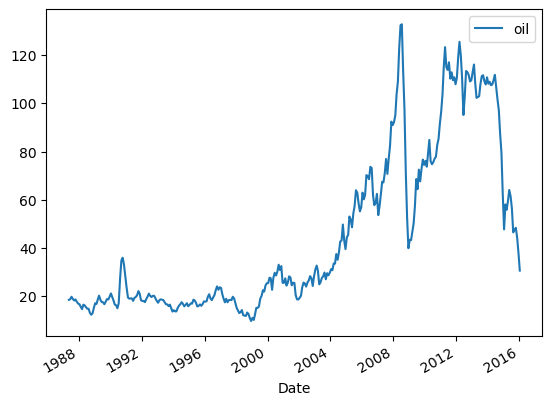

In [11]:
do.plot();

### Gold price

In [12]:
dg=pd.read_csv('https://datahub.io/core/gold-prices/r/monthly.csv')
dg

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [13]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [14]:
dg['Date']+'-15'

0      1950-01-15
1      1950-02-15
2      1950-03-15
3      1950-04-15
4      1950-05-15
          ...    
842    2020-03-15
843    2020-04-15
844    2020-05-15
845    2020-06-15
846    2020-07-15
Name: Date, Length: 847, dtype: object

In [16]:
dg['Date']=pd.to_datetime(dg['Date']+'-15')

In [17]:
dg

,Date,Price
0,1950-01-15,34.730
1,1950-02-15,34.730
2,1950-03-15,34.730
3,1950-04-15,34.730
4,1950-05-15,34.730
...,...,...
842,2020-03-15,1593.764
843,2020-04-15,1680.030
844,2020-05-15,1715.697
845,2020-06-15,1734.032


In [18]:
dg.set_index('Date',inplace=True)
dg

,Price
Date,
1950-01-15,34.730
1950-02-15,34.730
1950-03-15,34.730
1950-04-15,34.730
1950-05-15,34.730
...,...
2020-03-15,1593.764
2020-04-15,1680.030
2020-05-15,1715.697


In [19]:
dg.columns=['gold']
dg

,gold
Date,
1950-01-15,34.730
1950-02-15,34.730
1950-03-15,34.730
1950-04-15,34.730
1950-05-15,34.730
...,...
2020-03-15,1593.764
2020-04-15,1680.030
2020-05-15,1715.697


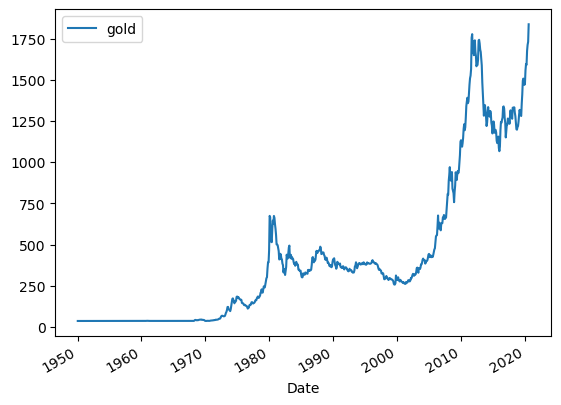

In [21]:
dg.plot();

In [24]:
df=pd.merge(do,dg,left_index=True,right_index=True,how='inner')
df

,oil,gold
Date,,
1987-05-15,18.58,461.650
1987-06-15,18.86,449.282
1987-07-15,19.86,450.330
1987-08-15,18.98,460.988
1987-09-15,18.31,460.120
...,...,...
2015-09-15,47.62,1124.905
2015-10-15,48.43,1157.123
2015-11-15,44.27,1088.388


In [25]:
df.corr()

,oil,gold
oil,1.000000,0.892805
gold,0.892805,1.000000


### Daily return

<Axes: >

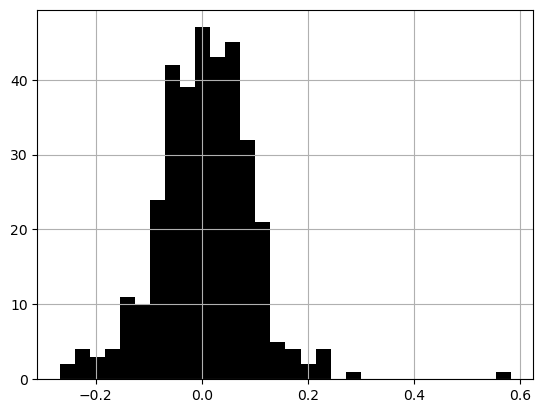

In [31]:
df['oil'].pct_change().hist(bins=30,color='black')

<Axes: >

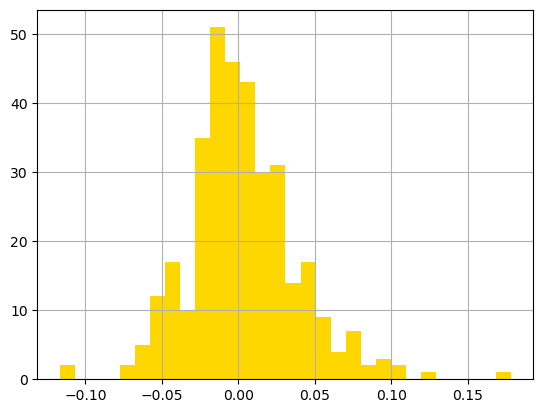

In [32]:
df['gold'].pct_change().hist(bins=30,color='gold')

<Axes: >

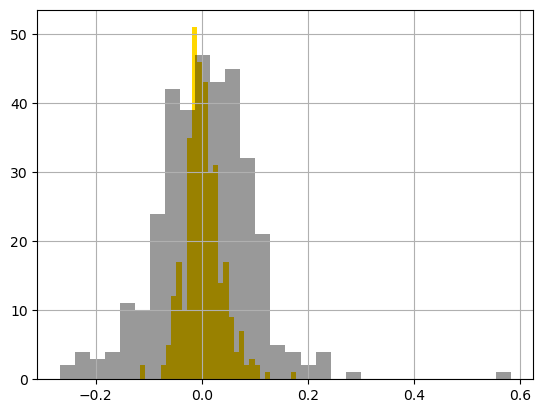

In [35]:
df['gold'].pct_change().hist(bins=30,color='gold')
df['oil'].pct_change().hist(bins=30,color='black',alpha=.4)

<Axes: xlabel='Date'>

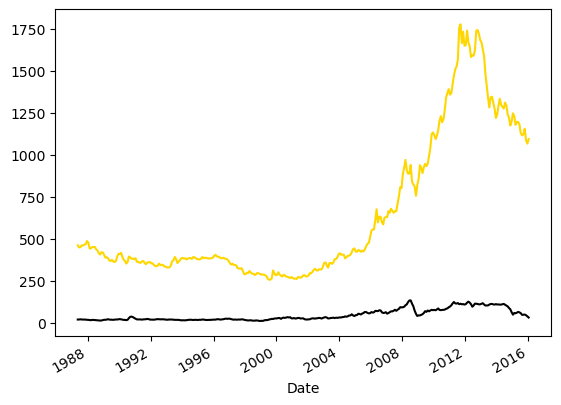

In [39]:
df['gold'].plot(color='gold')
df['oil'].plot(color='black')

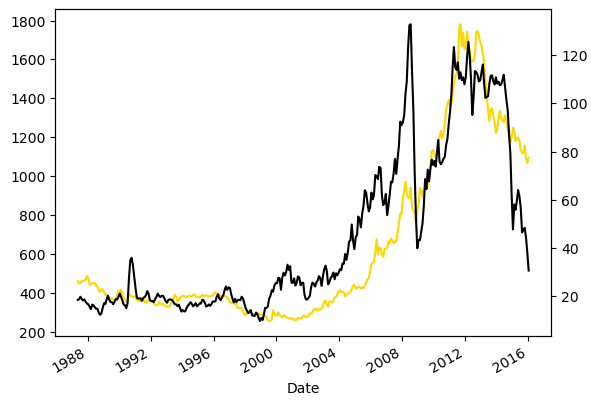

In [40]:
ax1=df['gold'].plot(color='gold')
ax2=ax1.twinx()
ax2=df['oil'].plot(color='black')

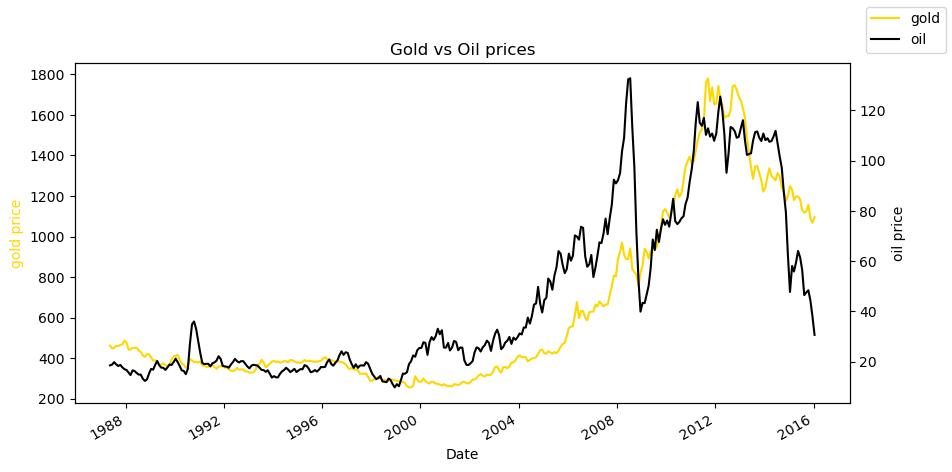

In [44]:
ax1=df['gold'].plot(color='gold',label='gold',figsize=(10,5))
ax1.set_ylabel('gold price',color='gold')

ax2=ax1.twinx()
ax2=df['oil'].plot(color='black',label='oil')
ax2.set_ylabel('oil price',color='black')

ax1.set_title('Gold vs Oil prices')
ax1.figure.legend()
plt.savefig('g_vs_o.png')

In [45]:
df

,oil,gold
Date,,
1987-05-15,18.58,461.650
1987-06-15,18.86,449.282
1987-07-15,19.86,450.330
1987-08-15,18.98,460.988
1987-09-15,18.31,460.120
...,...,...
2015-09-15,47.62,1124.905
2015-10-15,48.43,1157.123
2015-11-15,44.27,1088.388


In [47]:
df['gold'].iloc[0]

461.65

In [50]:
df['gold_chgf']=df['gold']/df['gold'].iloc[0]-1
df['oil_chgf']=df['oil']/df['oil'].iloc[0]-1
df

,oil,gold,gold_chgf,oil_chgf
Date,,,,
1987-05-15,18.58,461.650,0.000000,0.000000
1987-06-15,18.86,449.282,-0.026791,0.015070
1987-07-15,19.86,450.330,-0.024521,0.068891
1987-08-15,18.98,460.988,-0.001434,0.021529
1987-09-15,18.31,460.120,-0.003314,-0.014532
...,...,...,...,...
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566
2015-11-15,44.27,1088.388,1.357604,1.382670


<Axes: xlabel='Date'>

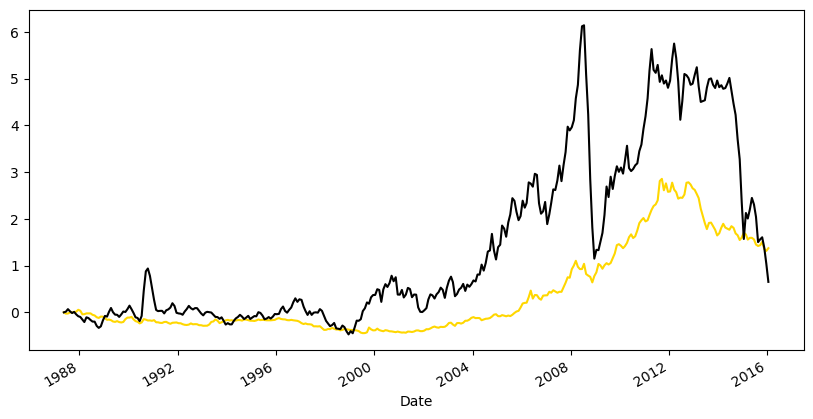

In [52]:
df['gold_chgf'].plot(color='gold',label='gold',figsize=(10,5))
df['oil_chgf'].plot(color='black',label='oil')

In [53]:
df

,oil,gold,gold_chgf,oil_chgf
Date,,,,
1987-05-15,18.58,461.650,0.000000,0.000000
1987-06-15,18.86,449.282,-0.026791,0.015070
1987-07-15,19.86,450.330,-0.024521,0.068891
1987-08-15,18.98,460.988,-0.001434,0.021529
1987-09-15,18.31,460.120,-0.003314,-0.014532
...,...,...,...,...
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566
2015-11-15,44.27,1088.388,1.357604,1.382670


In [58]:
df.loc['2010':'2015']

,oil,gold,gold_chgf,oil_chgf
Date,,,,
2010-01-15,76.17,1119.575,1.425160,3.099569
2010-02-15,73.75,1095.800,1.373660,2.969322
2010-03-15,78.83,1115.554,1.416450,3.242734
2010-04-15,84.82,1148.475,1.487761,3.565124
2010-05-15,75.95,1204.321,1.608732,3.087729
...,...,...,...,...
2015-08-15,46.52,1117.525,1.420719,1.503767
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566


In [59]:
dq=df.loc['2010':'2015']
dq

,oil,gold,gold_chgf,oil_chgf
Date,,,,
2010-01-15,76.17,1119.575,1.425160,3.099569
2010-02-15,73.75,1095.800,1.373660,2.969322
2010-03-15,78.83,1115.554,1.416450,3.242734
2010-04-15,84.82,1148.475,1.487761,3.565124
2010-05-15,75.95,1204.321,1.608732,3.087729
...,...,...,...,...
2015-08-15,46.52,1117.525,1.420719,1.503767
2015-09-15,47.62,1124.905,1.436705,1.562971
2015-10-15,48.43,1157.123,1.506494,1.606566


<Axes: xlabel='Date'>

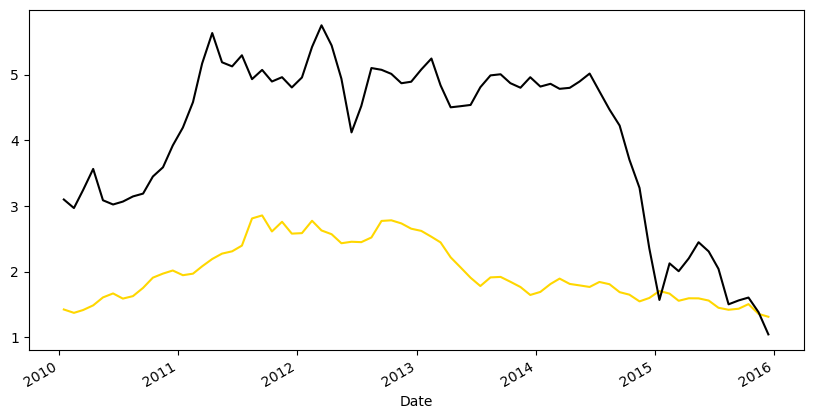

In [60]:
dq['gold_chgf'].plot(color='gold',label='gold',figsize=(10,5))
dq['oil_chgf'].plot(color='black',label='oil')

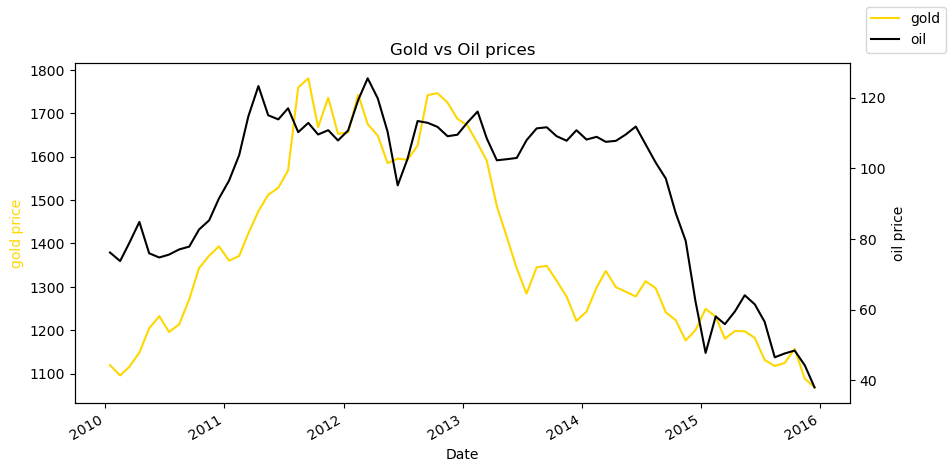

In [61]:
ax1=dq['gold'].plot(color='gold',label='gold',figsize=(10,5))
ax1.set_ylabel('gold price',color='gold')

ax2=ax1.twinx()
ax2=dq['oil'].plot(color='black',label='oil')
ax2.set_ylabel('oil price',color='black')

ax1.set_title('Gold vs Oil prices')
ax1.figure.legend()
plt.savefig('g_vs_o.png')